Load Model and Tokenizer

In [1]:
# from transformers import AutoModelForSequenceClassification, AutoTokenizer

# # Load the model and tokenizer
# model_path = 'my_bert_model'
# model = AutoModelForSequenceClassification.from_pretrained(model_path)
# tokenizer = AutoTokenizer.from_pretrained(model_path)


Prepare Input Data

In [2]:
# text = "Replace this text with something you'd like to classify."

# # Encoding text
# encoded_input = tokenizer(text, return_tensors='pt')

Perform Inference

In [3]:
# # Forward pass, get logit predictions
# output = model(**encoded_input)

# import torch.nn.functional as F

# # Apply softmax to the output logits
# probs = F.softmax(output.logits, dim=-1)

# # Assuming you want to print the probabilities of each class
# print(probs)

In [4]:
# Mapping of integers 0-7 to specific words
emotion_map = {
    0: "Anger",
    1: "Anticipation",
    2: "Disgust",
    3: "Fear",
    4: "Joy",
    5: "Sadness",
    6: "Surprise",
    7: "Trust"
}

In [5]:
import matplotlib.pyplot as plt

def tensor_to_emotion_table(tensor):
    # Ensure the tensor does not have gradient calculation
    tensor = tensor.detach()
    # Convert the tensor to a list of probabilities
    probs = tensor.tolist()[0]
    # Create a DataFrame for displaying the table
    df = pd.DataFrame({
        'Emotion': [emotion_map[i] for i in range(len(probs))],
        'Probability': probs
    })
    return df

def plot_emotion_probabilities(tensor):
    df = tensor
    # tensor_to_emotion_table(tensor)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(df['Emotion'], df['Probability'], color='skyblue')
    plt.xlabel('Emotion')
    plt.ylabel('Probability')
    plt.title('Probability Distribution of Emotions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [7]:
import torch
import torch.nn.functional as F
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_path = 'fed_finetune_v1'
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move model to the right device(model_path)


text = "I can’t wait to celebrate with you so let me know when you’re free!"

# Encoding text
encoded_input = tokenizer(text, return_tensors='pt')
encoded_input = {key: val.to(device) for key, val in encoded_input.items()}  # Move encoded input to the same device as model

# Forward pass, get logit predictions
output = model(**encoded_input)

# Apply softmax to the output logits to get probabilities
probs = F.softmax(output.logits, dim=-1)

# Print the probabilities of each class
print(probs)

tensor([[0.0843, 0.1876, 0.0791, 0.0855, 0.1888, 0.1276, 0.0932, 0.1539]],
       device='cuda:0', grad_fn=<SoftmaxBackward0>)


In [8]:
result = tensor_to_emotion_table(probs)

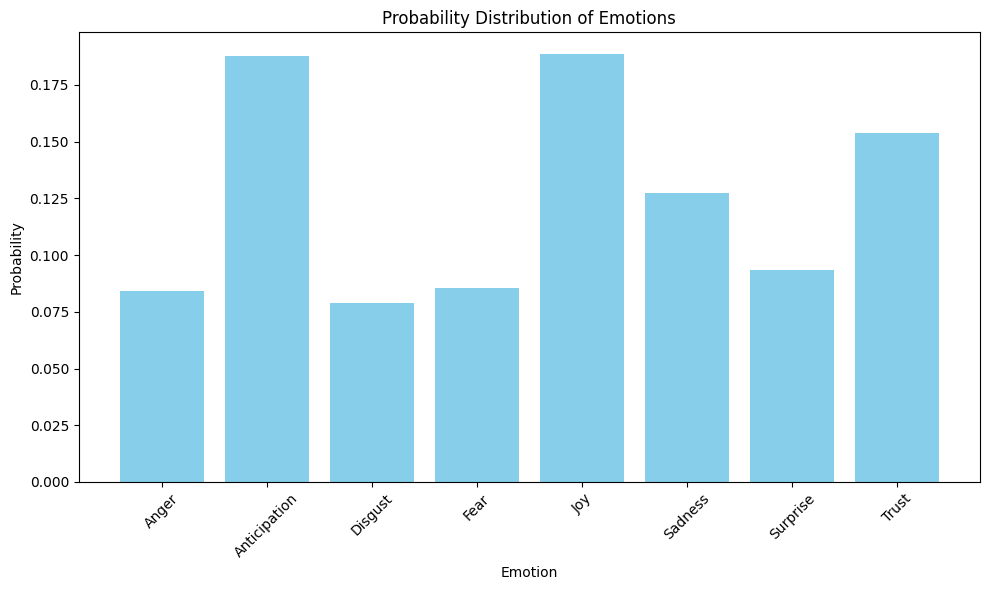

In [9]:
plot_emotion_probabilities(result)